## Task_1: Fake News Detector

In [7]:
import pandas as pd

In [8]:
true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv', on_bad_lines='skip')

In [9]:
#Creating 'check' on both dfs that will be the target feature.

true_df['check'] = 'TRUE'
fake_df['check'] = 'FAKE'

In [10]:
#We will combine both dfs.

df_news = pd.concat([true_df, fake_df])

In [11]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   check    44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [12]:
#Shuffling to see some Fakes

df_news.sample(frac = 1)

,title,text,subject,date,check
8673,Muslims Respond To Republican Mess By Bringin...,"Muslims care more about the people of Flint, M...",News,"January 18, 2016",FAKE
18834,MELANIA WINS HUGE SETTLEMENT FROM TABLOID Over...,Melania Trump just accepted damages of approxi...,left-news,"Apr 12, 2017",FAKE
9197,WATCH: “IT’S THE MOST WONDERFUL TIME OF THE YE...,With mainstream media and establishment politi...,politics,"Dec 14, 2017",FAKE
7752,U.S. judge orders Virginia to extend voter reg...,(Reuters) - A federal judge on Thursday ordere...,politicsNews,"October 20, 2016",TRUE
4623,"Paul Ryan Has A Request For Donald Trump, And...",House Speaker Paul Ryan sold his soul the day ...,News,"September 15, 2016",FAKE
...,...,...,...,...,...
9079,Clinton's lead over Trump slips after Florida ...,NEW YORK (Reuters) - Donald Trump chipped away...,politicsNews,"June 17, 2016",TRUE
2530,The Internet Can’t Stop Laughing After Sean S...,White House Press Secretary Sean Spicer told r...,News,"February 14, 2017",FAKE
9254,33-Yr Old Skier LINDSEY VONN Says She Won’t Re...,"Has there ever been a US Olympic athlete who, ...",politics,"Dec 7, 2017",FAKE
4756,"Trump Continues Racist Birtherism, Won’t Say ...",Republican presidential nominee Donald Trump s...,News,"September 5, 2016",FAKE


In [13]:
#Searching for null values.

df_news.isna().sum()

title      0
text       0
subject    0
date       0
check      0
dtype: int64

In [14]:
#We will join title, text and subject to create the article feature
df_news['article'] = df_news['title']+""+df_news['text']+""+['subject']

In [15]:
#Creating the final Dataframe with article and check.

df = df_news[['article','check']]

In [16]:
#Converting to lower case

df['article'] = df['article'].apply(lambda x: x.lower())

<ipython-input-16-07b2a66b433b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article'] = df['article'].apply(lambda x: x.lower())


In [17]:
df['article'].head()

0    as u.s. budget fight looms, republicans flip t...
1    u.s. military to accept transgender recruits o...
2    senior u.s. republican senator: 'let mr. muell...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge 'much mor...
Name: article, dtype: object

In [18]:
#Removing punctuation

import string

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [19]:
df['article'] = df['article'].apply(punctuation_removal)
df['article'].head()

<ipython-input-19-e814a93c2d3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['article'] = df['article'].apply(punctuation_removal)


0    as us budget fight looms republicans flip thei...
1    us military to accept transgender recruits on ...
2    senior us republican senator let mr mueller do...
3    fbi russia probe helped by australian diplomat...
4    trump wants postal service to charge much more...
Name: article, dtype: object

In [20]:
#Removing stopwords

import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' corpus
nltk.download('stopwords')

stop = stopwords.words('english')

df['article'].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0        [ , u,  , b, u, g, e,  , f, g, h,  , l,  , r, ...
1        [u,  , l, r,  ,  , c, c, e, p,  , r, n, g, e, ...
2        [e, n, r,  , u,  , r, e, p, u, b, l, c, n,  , ...
3        [f, b,  , r, u,  , p, r, b, e,  , h, e, l, p, ...
4        [r, u, p,  , w, n,  , p, l,  , e, r, v, c, e, ...
                               ...                        
23476    [c, p, n,  , j, h, n,  , c, c, n,  , f, u, r, ...
23477    [j, u, c, e,  , h,  , e, l, e,  , e, l,  , p, ...
23478    [u, n, n, n,  , u,  , n,  , l, l, e,  , ‘, f, ...
23479    [h, w,  ,  , b, l, w,  , 7, 0, 0,  , l, l, n, ...
23480    [1, 0,  , u,  , n, v,  , l, r,  , h, e, l,  , ...
Name: article, Length: 44898, dtype: object

In [21]:
df['article']

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
23476    mcpain john mccain furious that iran treated u...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan us and allied ‘safe zone’ plan to ta...
23479    how to blow 700 million al jazeera america fin...
23480    10 us navy sailors held by iranian military – ...
Name: article, Length: 44898, dtype: object

#### Visualizing the data with Wordcloud.

In [22]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df.article])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

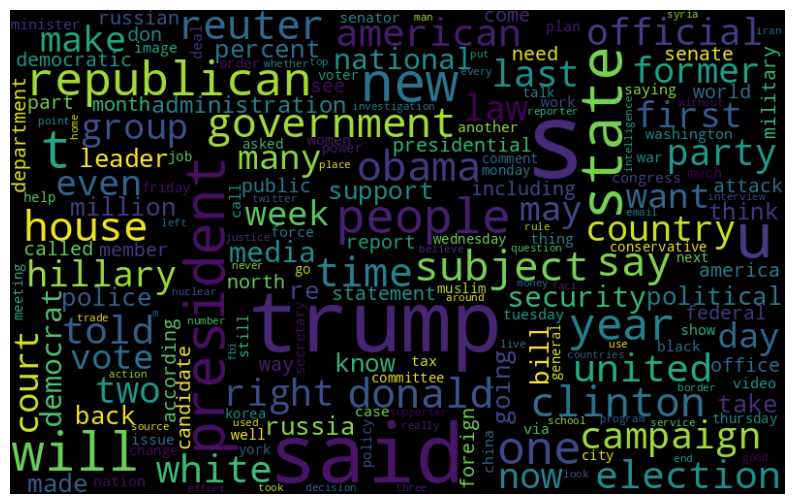

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### We will divide the data in to fake and true.

In [24]:
#Function to generate wordcloud to True news.

def wordcloud_true(text, column_text):
    true_text = text.query("check == 'TRUE'")
    all_words = ' '.join([text for text in true_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [25]:
#Function to generate wordcloud to Fake news.

def wordcloud_fake(text, column_text):
    fake_text = text.query("check == 'FAKE'")
    all_words = ' '.join([text for text in fake_text[column_text]])

    wordcloud = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

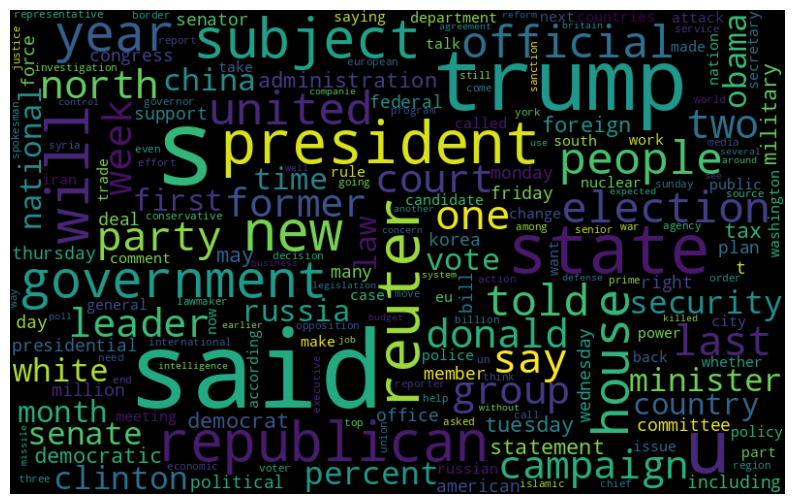

In [26]:
#Wordcloud of the true news.

wordcloud_true(df, "article")

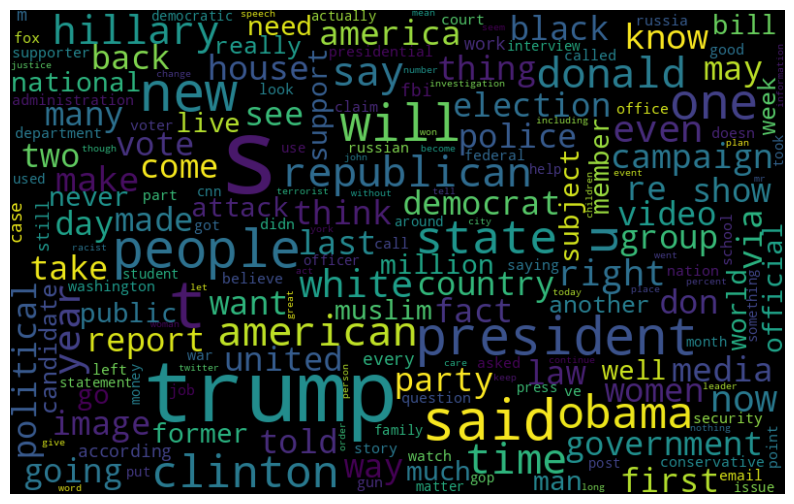

In [27]:
#Wordcloud of the fake news.

wordcloud_fake(df, "article")

#### Now we will plot the pareto chart to better visualize the frequencies of the words.

In [28]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

In [29]:
import seaborn as sns
import nltk

def pareto(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.show()

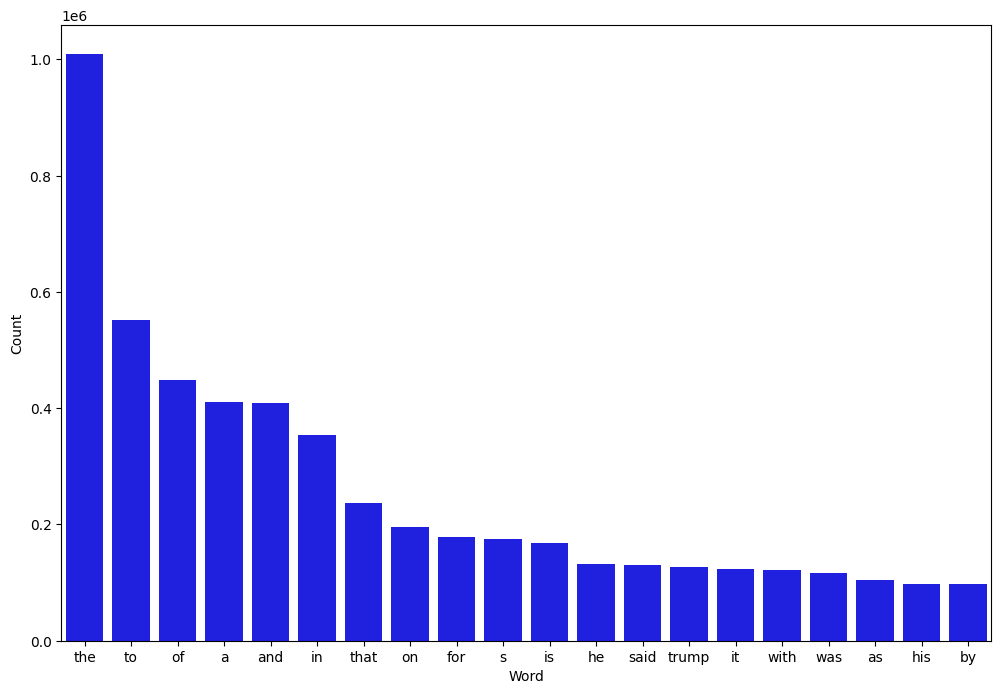

In [30]:
#The 20 more frequent words.

pareto(df, "article", 20)

#### We will create the BOW and the TF-IDF.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_article = CountVectorizer().fit(df['article'])

article_vect = bow_article.transform(df['article'])

In [32]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)
print(news_tfidf.shape)

(44898, 248247)


In [33]:
#We will use 20% of the data to train the models.

from sklearn.model_selection import train_test_split
X = news_tfidf
y = df['check']



X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.2)

In [34]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

fakenews_detector = MultinomialNB().fit(X_train, Y_train)

In [35]:
#Model Evaluation
predictions = fakenews_detector.predict(X_test)
print(predictions)

['FAKE' 'FAKE' 'TRUE' ... 'TRUE' 'TRUE' 'FAKE']


In [36]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.94      4662
        TRUE       0.95      0.93      0.94      4318

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [37]:
#Support vector Machine
from sklearn.linear_model import SGDClassifier

fake_detector_svc = SGDClassifier().fit(X_train, Y_train)
prediction_svc = fake_detector_svc.predict(X_test)
print (classification_report(Y_test, prediction_svc))

              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      4662
        TRUE       0.99      0.99      0.99      4318

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

fake_detector_logistic = LogisticRegression().fit(X_train, Y_train)

In [39]:
predictions_log_reg = fake_detector_logistic.predict(X_test)
print (classification_report(Y_test, predictions_log_reg))

              precision    recall  f1-score   support

        FAKE       0.99      0.98      0.99      4662
        TRUE       0.98      0.99      0.98      4318

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

